In [49]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
import pandas as pd
import sympy
from sympy import *
from scipy import integrate

# Polinomios de Legendre 

In [2]:
def Rodrigues(n):   # Aqui 'n' es el grado del polinomio
    x = sympy.Symbol('x')
    y = sympy.Symbol('y')
    y = (x**2 - 1)**n
    P = sympy.diff(y,x,n)/(2**n * math.factorial(n)) # Fórmula de Rodrigues
    return P

In [3]:
P0 = Rodrigues(0)
P0

1

In [4]:
P1 = Rodrigues(1)
P1

x

In [5]:
P2 = Rodrigues(2)
P2

(3*x**2 - 1)/2

In [6]:
P3 = Rodrigues(3)
P3

x*(5*x**2 - 3)/2

# Aproximación 

$f(x)=\sum_{k=1}^\infty\frac{2k+1}{2}\left [\int_{-1}^1 f(t)P_k(t)dt\right ]P_k(x)$

# Primer punto

$f(x)=e^{x}$ 

$k=0,...,3$

In [7]:
a = np.arange(-1.0,1.0,0.01)   
f = np.zeros(len(a))

x = sympy.Symbol('x')
for k in range(4):   # k = 0,1,...,3
    temp = ((2*k+1)/2)*integrate(exp(x)*Rodrigues(k), (x, -1, 1))
    P    = lambdify(x,Rodrigues(k),"numpy") # Polinomios de Legendre 
    f    = f + temp*P(a)   # Aproximacion de la funcion



![title](img/primero/exp.png)


# Segundo punto 

$f(x)=|x|$

$k = 0,1,...,4$

In [8]:
a = np.arange(-1.0,1.0,0.01)   
f = np.zeros(len(a))

x = sympy.Symbol('x')
for k in range(5):   # k = 0,1,...,4
    temp = ((2*k+1)/2)*integrate(abs(x)*Rodrigues(k), (x, -1, 1))
    P    = lambdify(x,Rodrigues(k),"numpy") # Polinomios de Legendre 
    f    = f + temp*P(a)   # Aproximacion de la funcion

![title](img/segundo_a/abs.png)

$f(x)= \left\{ \begin{array}{lcc}
             0 &   si  & -1 < x < 0 \\
             \\ 1 &  si & 0 \leq x < 1 \\
             \end{array}
   \right.$

$k = 0,1...,5$

In [9]:
def fx(x):
    f = np.zeros(len(x))
    pos = 0
    for i in x:
        if (-1 < i < 0):
            f[pos] = 0.0
        elif (0 <= i < 1):
            f[pos] = 1.0
        pos = pos + 1
    return f


In [10]:
a = np.arange(-1.0,1.0,0.01)
for k in range(6):   # k = 0,1,...,5
    temp = ((2*k+1)/2)*integrate(Rodrigues(k), (x, 0, 1))  # de -1 a 0 es cero 
    P    = lambdify(x,Rodrigues(k),"numpy") # Polinomios de Legendre 
    f    = f + temp*P(a)   # Aproximacion de la funcion

![title](img/segundo_b/escalon.png)

# Tercer punto 

In [11]:
x = np.arange(0.00,1.05,0.05)
y = np.array([0.486,0.866,0.944,1.144,1.103,1.202,1.166,1.191,1.124,1.095,1.122,1.102,1.099,1.017,
              1.111,1.117,1.152,1.265,1.380,1.575,1.875])

## Polinomios de Chebyshev. Orden 2

In [12]:
p = np.polynomial.Chebyshev.fit(x,y,2)


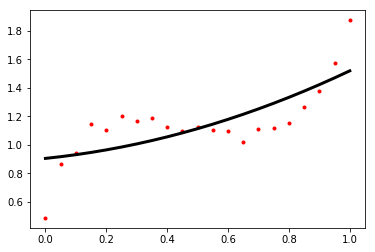

In [13]:
plt.plot(x, y, 'r.')
plt.plot(x, p(x), 'k-', lw=3)
plt.show()

## Polinomios de Chebyshev. Orden 2

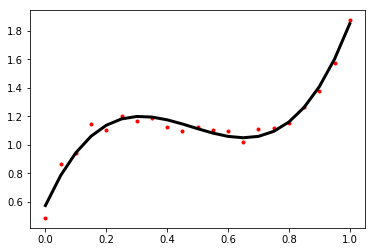

In [14]:
p = np.polynomial.Chebyshev.fit(x,y,3)
plt.plot(x, y, 'r.')
plt.plot(x, p(x), 'k-', lw=3)
plt.show()

# Cuarto punto 

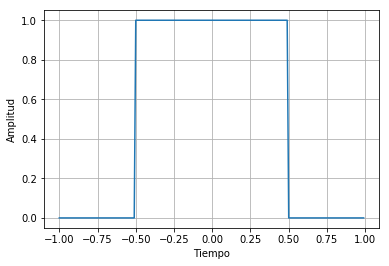

In [19]:
u = lambda t:np.piecewise(t,t>=0,[1,0]);
def f(t): return u(t+0.5)-u(t-0.5);
dt = 0.01;
t = np.arange(-1,1,dt);
plt.plot(t,f(t))
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

In [20]:
def serie_Fourier(f,N):
    t = sympy.symbols('t')
    a0, err0 = integrate.quad(lambda x: f(x),-np.pi,np.pi)
    a0 = (1/np.pi)*a0;
    y = a0*0.5;
    n = 1;
    while (n<=N):
        an, errn = integrate.quad(lambda x: f(x)*np.cos(n*x),-np.pi,np.pi);
        an = (1/np.pi)*an;
        bn, errn = integrate.quad(lambda x: f(x)*np.sin(n*x),-np.pi,np.pi);
        bn = (1/np.pi)*bn;
        y += an*sympy.cos(n*t)+bn*sympy.sin(n*t);
        n = n+1;
    return y

In [24]:
print('Aproximación con N = 3: ',Serie_F1)
print('Aproximación con N = 7: ',Serie_F2)
print('Aproximación con N = 10: ',Serie_F3)

Aproximación con N = 3:  0.305211778162803*cos(t) + 0.267848533961049*cos(2*t) + 0.211675014771781*cos(3*t) + 0.159154943610018
Aproximación con N = 7:  0.305211778162803*cos(t) + 0.267848533961049*cos(2*t) + 0.211675014771781*cos(3*t) + 0.144719179788818*cos(4*t) + 0.0761998391993789*cos(5*t) + 0.0149732968753895*cos(6*t) - 0.0319022207649885*cos(7*t) + 0.159154943610018
Aproximación con N = 10:  0.305211778162803*cos(t) + 0.267848533961049*cos(2*t) + 0.211675014771781*cos(3*t) + 0.144719179788818*cos(4*t) + 0.0761998391993789*cos(5*t) + 0.0149732968753895*cos(6*t) - 0.0319022207649885*cos(7*t) - 0.0602244297136036*cos(8*t) - 0.0691461114395926*cos(9*t) - 0.0610470150514361*cos(10*t) + 0.159154943610018


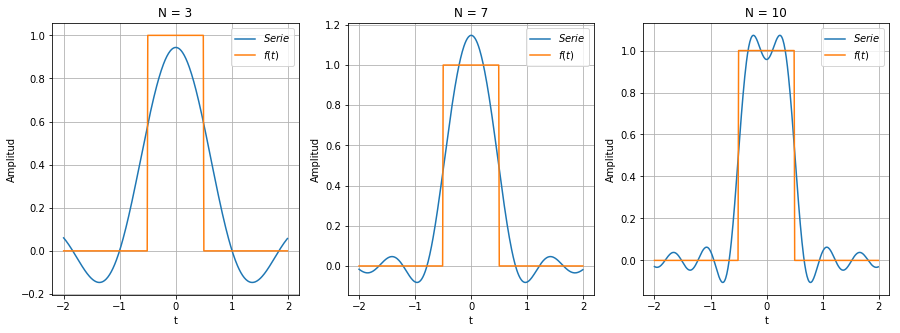

In [25]:
t_axis = np.arange(-2,2,0.01);
y_axis1 = [];
y_axis2 = [];
y_axis3 = [];

for index in t_axis:
    y_axis1.append(Serie_F1.subs('t',index));
    y_axis2.append(Serie_F2.subs('t',index));
    y_axis3.append(Serie_F3.subs('t',index));
    
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t_axis,y_axis1,label='$Serie$')
plt.plot(t_axis,f(t_axis),label='$f(t)$')
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('N = 3')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(t_axis,y_axis2,label='$Serie$')
plt.plot(t_axis,f(t_axis),label='$f(t)$')
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('N = 7')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(t_axis,y_axis3,label='$Serie$')
plt.plot(t_axis,f(t_axis),label='$f(t)$')
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('N = 10')
plt.legend()
plt.grid()
plt.show()

/home/guerreroasus/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


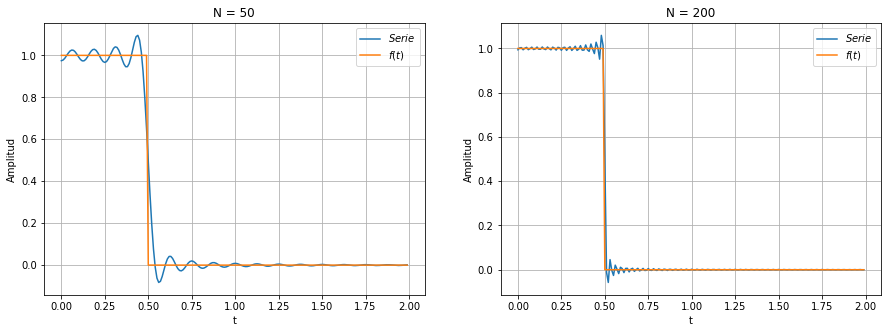

In [27]:
Serie_F50 = serie_Fourier(f,50);
Serie_F200 = serie_Fourier(f,200);

t_axis = np.arange(0,2,0.01);
y_axis1 = [];
y_axis2 = [];

for index in t_axis:
    y_axis1.append(Serie_F50.subs('t',index));
    y_axis2.append(Serie_F200.subs('t',index));
    
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(t_axis,y_axis1,label='$Serie$')
plt.plot(t_axis,f(t_axis),label='$f(t)$')
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('N = 50')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(t_axis,y_axis2,label='$Serie$')
plt.plot(t_axis,f(t_axis),label='$f(t)$')
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('N = 200')
plt.legend()
plt.grid()
plt.show()

## Quinto punto

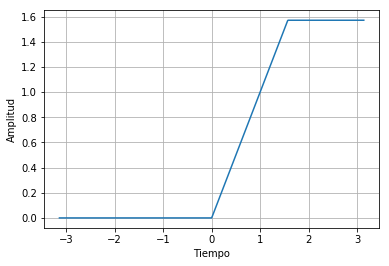

In [28]:
u = lambda t:np.piecewise(t,t>=0,[1,0]);
def f(t): return t*u(t)+(np.pi/2-t)*u(t-np.pi/2);
dt = 0.01;
t = np.arange(-np.pi,np.pi,dt);
plt.plot(t,f(t))
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

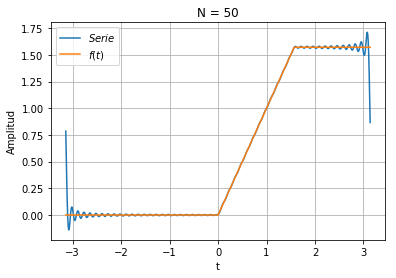

In [29]:
Serie_F = serie_Fourier(f,50);

t_axis = np.arange(-np.pi,np.pi,0.01);
y_axis = [];
for index in t_axis:
    y_axis.append(Serie_F.subs('t',index));
    
plt.plot(t_axis,y_axis,label='$Serie$')
plt.plot(t_axis,f(t_axis),label='$f(t)$')
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('N = 50')
plt.legend()
plt.grid()
plt.show()

## Sexto punto

In [41]:
data = pd.read_csv('/media/guerreroasus/TOSHIBA EXT/Universidad/Master/Semester_II/Aplicada_2/Taller1/mareas.csv');
data.head(5)

,Code,Date,Time,Height(m)
0,2,18/09/2018,0:00:00,3180
1,2,18/09/2018,0:05:00,3150
2,2,18/09/2018,0:10:00,3120
3,2,18/09/2018,0:15:00,3100
4,2,18/09/2018,0:20:00,3070


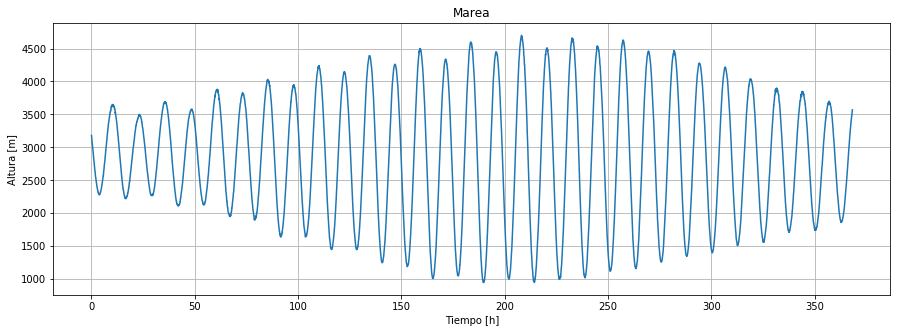

In [42]:
marea = data.values;
altura = marea[:,3];
hora = np.arange(len(marea))*5/60
fig = plt.figure(figsize=(15,5))
plt.plot(hora,altura);
plt.xlabel('Tiempo [h]')
plt.ylabel('Altura [m]')
plt.title('Marea')
plt.grid()
plt.show()

In [ ]:
f = 12  # Hz
dt = 1 / (f * len(altura))  # Espaciado, N puntos por período
Potencia=fft(altura);
frq = fftfreq(len(altura), dt)

In [ ]:
fig = plt.figure(figsize=(12,5))
plt.plot(frq,abs(Potencia))
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.title('Marea')
plt.grid()
plt.show()

![title](img/final.png)